In [51]:
###Impotar paquetes

import dopplergramas as dp ###codigo hecho por nosotros
import pandas as pd
from astropy.io import fits ### leer cubo de datos o extensiones de .fits
import numpy as np
import sympy as s
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import solve, Symbol
from sympy import interpolating_spline as inter
import time
import heapq
from scipy import stats
from scipy.stats import levene
import math

In [66]:
tabla=pd.read_csv("datoscromosfericos.csv") ### Lectura de los datos
print(tabla.info)
nombrecolumnas = tabla.columns.values
tabla.index.name='Numero de espectro'    ## nombrando los indices
tabla.columns.name='Caracteristicas de espectro' ##nombrando los indices de las columnas 
print(nombrecolumnas)

<bound method DataFrame.info of       Unnamed: 0     obsid                           fitsname    snrg    snrr  \
0              0    102084     spec-55859-F5902_sp02-084.fits   54.80   78.63   
1              1    103019     spec-55859-F5902_sp03-019.fits   66.33   99.07   
2              2    103025     spec-55859-F5902_sp03-025.fits   55.40   84.64   
3              3    103032     spec-55859-F5902_sp03-032.fits  387.09  455.38   
4              4    103110     spec-55859-F5902_sp03-110.fits   53.28   76.25   
...          ...       ...                                ...     ...     ...   
4995        4995  18803047  spec-55916-F5591604_sp03-047.fits   58.70   80.28   
4996        4996  18803059  spec-55916-F5591604_sp03-059.fits   56.39   71.56   
4997        4997  18803063  spec-55916-F5591604_sp03-063.fits   78.30  116.71   
4998        4998  18803070  spec-55916-F5591604_sp03-070.fits   98.43  139.79   
4999        4999  18803087  spec-55916-F5591604_sp03-087.fits   78.06   99.37

In [183]:
##elimando una columna repetida que no aporta información
tabla=tabla.loc[:,'obsid':]
tabla.columns



Index(['obsid', 'fitsname', 'snrg', 'snrr', 'teff', 'teff_err', 'logg',
       'logg_err', 'feh', 'feh_err', 'rv', 'rv_err', 'ra_obs', 'dec_obs',
       'gaia_source_id', 'gaia_g_mean_mag', 'figname', 'R_mean', 'R_mean_err',
       'V_mean', 'V_mean_err', 'H_mean_tri', 'H_mean_tri_err', 'K_mean_tri',
       'K_mean_tri_err', 'S_tri', 'S_tri_err', 'S_MWL', 'S_MWL_err',
       'H_mean_rec', 'H_mean_rec_err', 'K_mean_rec', 'K_mean_rec_err', 'S_rec',
       'S_rec_err', 'condition_tag'],
      dtype='object', name='Caracteristicas de espectro')

In [54]:
tabla.describe()

Caracteristicas de espectro,obsid,snrg,snrr,teff,teff_err,logg,logg_err,feh,feh_err,rv,...,S_tri,S_tri_err,S_MWL,S_MWL_err,H_mean_rec,H_mean_rec_err,K_mean_rec,K_mean_rec_err,S_rec,S_rec_err
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.264929e+06,75.122072,111.155474,5942.668248,32.655850,4.259297,0.046041,-0.142041,0.027444,-10.958332,...,0.248005,-27.981340,0.194634,-27.984753,492.279823,33.660284,438.011095,38.587159,0.244747,-27.976972
std,6.459866e+06,37.504852,52.571105,412.042352,6.955173,0.181108,0.010113,0.240283,0.006331,33.853234,...,0.044251,528.409776,0.034728,528.409595,1225.624029,147.238854,1088.908278,41.865508,0.045103,528.410007
min,1.020840e+05,50.000000,71.430000,4802.020000,10.260000,3.691000,0.013000,-0.994000,0.006000,-206.070000,...,0.122574,-9999.000000,0.096196,-9999.000000,3.746629,-9999.000000,3.353239,0.494952,0.117571,-9999.000000
25%,1.316063e+06,56.330000,84.767500,5670.380000,28.160000,4.133000,0.040000,-0.300000,0.024000,-32.022500,...,0.220155,0.010517,0.172778,0.008254,151.943703,15.810455,130.982440,16.936695,0.216441,0.013415
50%,8.308176e+06,64.670000,98.115000,5940.315000,31.760000,4.228000,0.045000,-0.126000,0.027000,-11.855000,...,0.240573,0.014786,0.188802,0.011604,253.258075,25.061074,220.538909,27.149124,0.237210,0.018841
75%,1.470602e+07,79.725000,118.920000,6247.597500,36.202500,4.359000,0.051000,0.027000,0.031000,9.010000,...,0.266516,0.019929,0.209162,0.015640,462.737942,41.279476,406.893648,45.051197,0.263405,0.025414
max,1.880309e+07,657.600000,944.640000,6799.830000,68.810000,4.865000,0.095000,0.597000,0.057000,156.800000,...,0.815786,0.092824,0.640229,0.072849,52095.037161,968.550495,45142.655884,1062.263856,0.826853,0.118067


In [55]:
#### Revision por si hay valores NAN
tabla.isnull().values.any()
tabla.isnull().sum()

Caracteristicas de espectro
obsid              0
fitsname           0
snrg               0
snrr               0
teff               0
teff_err           0
logg               0
logg_err           0
feh                0
feh_err            0
rv                 0
rv_err             0
ra_obs             0
dec_obs            0
gaia_source_id     5
gaia_g_mean_mag    5
figname            0
R_mean             0
R_mean_err         0
V_mean             0
V_mean_err         0
H_mean_tri         0
H_mean_tri_err     0
K_mean_tri         0
K_mean_tri_err     0
S_tri              0
S_tri_err          0
S_MWL              0
S_MWL_err          0
H_mean_rec         0
H_mean_rec_err     0
K_mean_rec         0
K_mean_rec_err     0
S_rec              0
S_rec_err          0
condition_tag      0
dtype: int64

### Los parametros donde tiene el NAN es referente al catalogo GAIA DR2, lo cual son interesantes
### ya que posiblemente no esten registradas esas fuentes

In [56]:
### Borrado de datos 
tabla = tabla.dropna()
###verificacion si ahora el dataframe tiene NAN
tabla.isnull().values.any()


False

In [57]:
###Significado de cada columna

temperatura_efectiva = tabla["teff"]
error_temperatura_efectiva=tabla["teff_err"]
gravedad=tabla["logg"]
error_gravedad=tabla["logg_err"]
metalicidad=tabla["feh"]
error_metalicidad=tabla["feh_err"]


###tabla numerica

tabla_numerica=tabla.drop(["gaia_source_id","fitsname","figname","condition_tag"], axis=1)
tabla_numerica.isna().all()



Caracteristicas de espectro
obsid              False
snrg               False
snrr               False
teff               False
teff_err           False
logg               False
logg_err           False
feh                False
feh_err            False
rv                 False
rv_err             False
ra_obs             False
dec_obs            False
gaia_g_mean_mag    False
R_mean             False
R_mean_err         False
V_mean             False
V_mean_err         False
H_mean_tri         False
H_mean_tri_err     False
K_mean_tri         False
K_mean_tri_err     False
S_tri              False
S_tri_err          False
S_MWL              False
S_MWL_err          False
H_mean_rec         False
H_mean_rec_err     False
K_mean_rec         False
K_mean_rec_err     False
S_rec              False
S_rec_err          False
dtype: bool

In [58]:
## Correlación de los flujos e indices entre ellos.
tabla_numerica.corr()

Caracteristicas de espectro,obsid,snrg,snrr,teff,teff_err,logg,logg_err,feh,feh_err,rv,...,S_tri,S_tri_err,S_MWL,S_MWL_err,H_mean_rec,H_mean_rec_err,K_mean_rec,K_mean_rec_err,S_rec,S_rec_err
Caracteristicas de espectro,,,,,,,,,,,,,,,,,,,,,
obsid,1.000000,0.121219,0.115381,0.039485,-0.025037,-0.029787,-0.035391,-0.049850,-0.045747,0.153700,...,0.049612,-0.016237,0.049612,-0.016236,0.113593,0.040106,0.114599,0.137649,0.049235,-0.016237
snrg,0.121219,1.000000,0.930835,0.172016,-0.363478,-0.104653,-0.420556,0.031884,-0.490838,0.063539,...,0.059737,0.008286,0.059736,0.008288,0.533142,0.026510,0.536688,0.070400,0.057350,0.008284
snrr,0.115381,0.930835,1.000000,0.066088,-0.361830,-0.028750,-0.413269,0.082959,-0.477756,0.053783,...,0.068325,0.000648,0.068325,0.000650,0.526053,0.033173,0.528107,0.096181,0.067402,0.000646
teff,0.039485,0.172016,0.066088,1.000000,-0.384411,-0.653991,-0.386691,-0.226442,-0.385070,0.032716,...,0.064268,0.024170,0.064268,0.024171,0.175354,0.034371,0.183950,0.144697,0.048023,0.024168
teff_err,-0.025037,-0.363478,-0.361830,-0.384411,1.000000,0.286389,0.996841,0.177665,0.985317,-0.030953,...,0.034582,-0.000556,0.034582,-0.000557,-0.196200,-0.001155,-0.197287,-0.015236,0.040837,-0.000554
logg,-0.029787,-0.104653,-0.028750,-0.653991,0.286389,1.000000,0.285302,0.155024,0.282472,0.036593,...,0.178078,-0.019875,0.178078,-0.019876,-0.096881,-0.017295,-0.097096,-0.083418,0.187267,-0.019873
logg_err,-0.035391,-0.420556,-0.413269,-0.386691,0.996841,0.285302,1.000000,0.167987,0.994341,-0.034998,...,0.026605,-0.001664,0.026605,-0.001665,-0.219320,-0.002361,-0.220730,-0.019109,0.032824,-0.001662
feh,-0.049850,0.031884,0.082959,-0.226442,0.177665,0.155024,0.167987,1.000000,0.155568,-0.039890,...,-0.047615,-0.005856,-0.047615,-0.005856,0.012613,0.042217,0.013215,0.072090,-0.039394,-0.005855
feh_err,-0.045747,-0.490838,-0.477756,-0.385070,0.985317,0.282472,0.994341,0.155568,1.000000,-0.039138,...,0.017588,-0.002267,0.017588,-0.002269,-0.246357,-0.005340,-0.248203,-0.022009,0.023739,-0.002265


In [59]:
#Covarianza de los flujos e indeces entre ellos.
tabla_numerica.cov()

Caracteristicas de espectro,obsid,snrg,snrr,teff,teff_err,logg,logg_err,feh,feh_err,rv,...,S_tri,S_tri_err,S_MWL,S_MWL_err,H_mean_rec,H_mean_rec_err,K_mean_rec,K_mean_rec_err,S_rec,S_rec_err
Caracteristicas de espectro,,,,,,,,,,,,,,,,,,,,,
obsid,4.173247e+13,2.938167e+07,3.920169e+07,1.050695e+08,-1.125216e+06,-34841.423060,-2312.732429,-77391.924970,-1871.314037,3.362286e+07,...,14187.795342,-5.545245e+07,11134.516510,-5.545102e+07,8.998183e+08,3.816714e+07,8.065284e+08,3.724571e+07,14350.857137,-5.545429e+07
snrg,2.938167e+07,1.407788e+03,1.836863e+03,2.658573e+03,-9.487769e+01,-0.710980,-0.159619,0.287493,-0.116615,8.072921e+01,...,0.099220,1.643593e+02,0.077867,1.643936e+02,2.452883e+04,1.465284e+02,2.193768e+04,1.106390e+02,0.097089,1.643152e+02
snrr,3.920169e+07,1.836863e+03,2.766117e+03,1.431747e+03,-1.323904e+02,-0.273786,-0.219867,1.048547,-0.159107,9.578739e+01,...,0.159075,1.802265e+01,0.124842,1.806170e+01,3.392581e+04,2.570193e+02,3.025920e+04,2.118817e+02,0.159948,1.797246e+01
teff,1.050695e+08,2.658573e+03,1.431747e+03,1.696761e+05,-1.101596e+03,-48.777518,-1.611265,-22.416022,-1.004384,4.563415e+02,...,1.171910,5.263406e+03,0.919715,5.263739e+03,8.857102e+04,2.085664e+03,8.254896e+04,2.496532e+03,0.892540,5.262977e+03
teff_err,-1.125216e+06,-9.487769e+01,-1.323904e+02,-1.101596e+03,4.839870e+01,0.360754,0.070151,0.297036,0.043405,-7.291958e+00,...,0.010650,-2.043745e+00,0.008358,-2.048440e+00,-1.673716e+03,-1.183840e+00,-1.495261e+03,-4.439658e+00,0.012819,-2.037686e+00
logg,-3.484142e+04,-7.109797e-01,-2.737859e-01,-4.877752e+01,3.607535e-01,0.032785,0.000523,0.006746,0.000324,2.243697e-01,...,0.001427,-1.902490e+00,0.001120,-1.902604e+00,-2.151015e+01,-4.613059e-01,-1.915317e+01,-6.326470e-01,0.001530,-1.902344e+00
logg_err,-2.312732e+03,-1.596189e-01,-2.198672e-01,-1.611265e+00,7.015119e-02,0.000523,0.000102,0.000408,0.000064,-1.198823e-02,...,0.000012,-8.898767e-03,0.000009,-8.906253e-03,-2.720419e+00,-3.518960e-03,-2.432507e+00,-8.096628e-03,0.000015,-8.889110e-03
feh,-7.739192e+04,2.874925e-01,1.048547e+00,-2.241602e+01,2.970361e-01,0.006746,0.000408,0.057754,0.000237,-3.246207e-01,...,-0.000507,-7.439670e-01,-0.000398,-7.440227e-01,3.716865e+00,1.494586e+00,3.459950e+00,7.256556e-01,-0.000427,-7.438948e-01
feh_err,-1.871314e+03,-1.166153e-01,-1.591074e-01,-1.004384e+00,4.340524e-02,0.000324,0.000064,0.000237,0.000040,-8.392111e-03,...,0.000005,-7.590590e-03,0.000004,-7.595710e-03,-1.912840e+00,-4.980886e-03,-1.712208e+00,-5.837362e-03,0.000007,-7.583988e-03


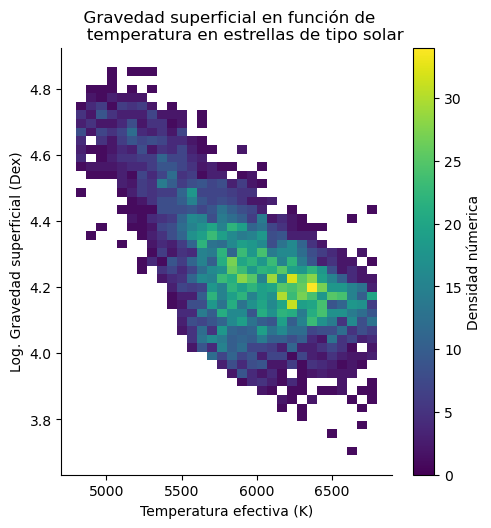

In [10]:
fig=sns.displot(data=tabla,x="teff",y="logg",cmap="viridis",
                cbar=True,cbar_kws={'label': 'Densidad númerica'})
fig.set(xlabel='Temperatura efectiva (K)',
       ylabel='Log. Gravedad superficial (Dex)',
       title="""  Gravedad superficial en función de 
       temperatura en estrellas de tipo solar""")
#plt.savefig("secuencia_principal.pdf",bbox_inches='tight')



In [11]:
fig=sns.displot(data=tabla_numerica,x="logg",y="feh", cbar=True,
                cmap="viridis",cbar_kws={'label': 'Densidad númerica'})
fig.set(xlabel='Log. Gravedad superficial (Dex)',
       ylabel='Metalicidad [Fe/H] (dex)',
       title="""Metalicidad en funcion de Gravedad Superficial""")
plt.savefig("metalicidad.pdf", bbox_inches="tight")

In [12]:
fig=sns.displot(data=tabla_numerica,x="logg",y="feh",kind="kde",fill=True, cbar=True,
                cmap="mako")
fig.set(xlabel='Log. Gravedad superficial (Dex)',
       ylabel='Metalicidad [Fe/H] (dex)',
       title="""Metalicidad en funcion de Gravedad Superficial""")
parameters = {'axes.labelsize':10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.savefig("biverian_metalicidad.pdf", bbox_inches="tight")


In [13]:
sns.relplot(data=tabla, x="snrg",y="snrr")
plt.title("Relaciones de las señales ruido entre la banda roja y la banda verde")
#plt.savefig('señalesruido.pdf',bbox_inches='tight')



Text(0.5, 1.0, 'Relaciones de las señales ruido entre la banda roja y la banda verde')

In [14]:
fig=sns.displot(data=tabla_numerica,x="logg",y="rv",kind="kde",fill=True, cbar=True,cmap="mako")

fig.set(xlabel='Log. Gravedad superficial (Dex)',
       ylabel='Velocidad radial',
       title="""Metalicidad en funcion de Gravedad Superficial""")
parameters = {'axes.labelsize':10,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.savefig("biverian_velocidad.pdf", bbox_inches="tight")


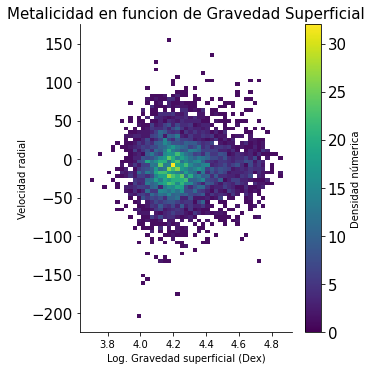

In [86]:
fig=sns.displot(data=tabla_numerica,x="logg",y="rv",cbar=True, cmap="viridis",
            cbar_kws={'label': 'Densidad númerica'})
fig.set(xlabel='Log. Gravedad superficial (Dex)',
       ylabel='Velocidad radial',
       title="""Metalicidad en funcion de Gravedad Superficial""")
parameters = {'axes.labelsize':20,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
plt.savefig("velocidad.pdf", bbox_inches="tight")


In [27]:
sns.displot(data=tabla_numerica,x="logg",y="rv",cbar=True, cmap="viridis")

1.3047869845619968 13.136296670676828


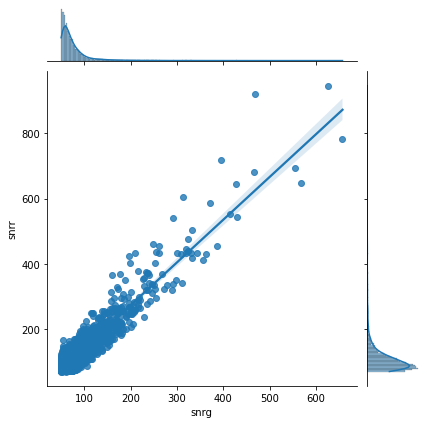

In [15]:
pendiente, intercepto,r_valor,p_valor,std_error=sc.stats.linregress(tabla["snrg"],tabla["snrr"]) 
sns.jointplot(data=tabla, x="snrg", y="snrr", kind="reg")
#plt.savefig('regresion.pdf',bbox_inches='tight')

print(pendiente, intercepto)


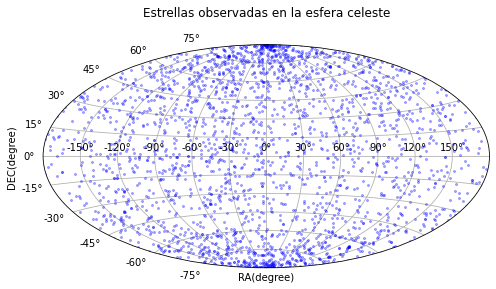

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4.2))
plt.subplot(111, projection="aitoff")
plt.title("Estrellas observadas en la esfera celeste",y=1.1)
plt.grid(True)
plt.plot(tabla["dec_obs"], tabla["ra_obs"], 'o', markersize=2, alpha=0.3, color="blue")
plt.ylabel("DEC(degree)")
plt.xlabel("RA(degree)")

plt.subplots_adjust(top=0.95,bottom=0.0)


#plt.savefig('esferaceleste.pdf',bbox_inches='tight')
plt.show()


# Se hace un ejemplo pequeño de como se obtienen las velocidades en la línea de la visual VLOS



In [18]:
###constantes usadas 

# Leer datos
hdul = fits.open("6302_degraded_withnoise_stray_hinode_mu05.fits")### es  6302 angstrom la linea sintetizada "Hierro"
hdul.info()
image_data = hdul[0].data
print(repr(hdul[0].header))

###arreglo de puntos###
n=np.arange(0,150) ## siendo 150 puntos de parametos en longitud de onda

    




#Constantes
c = 299792.458
lr = 6301.5008  #longitud de onda ref, medida en angstrom , o longitude de onda de emision del hierro neutro
xs = 226##eje x 
ys = 205
arreglo_correcto=[]
for i in range(150):
    arreglo_correcto.append(lr-1+(2/150)*i)
arreglo_correcto=np.array(arreglo_correcto)###se hace el arreglo para que quede en parametros fisicos


# Matriz y listas para guardar los pixeles a revisar
gris=np.zeros((ys,xs))# la nueva matriz que establece las velocidades en la linea de la visual "dopplergrama"




perfil_referencia = 0.5 #bisector

Filename: 6302_degraded_withnoise_stray_hinode_mu05.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   (150, 4, 227, 206)   float32   
  1                1 ImageHDU         6   (150,)   float64   
  2                1 ImageHDU         7   (227, 206)   float32   
SIMPLE  =                    T / Written by IDL:  Fri Aug 28 11:24:26 2020      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    4 / Number of data axes                            
NAXIS1  =                  150 /                                                
NAXIS2  =                    4 /                                                
NAXIS3  =                  227 /                                                
NAXIS4  =                  206 /                                                
EXTEND  =                    T                                                  
DATE    = '2020-08-07'         

Text(0.5, 1.0, 'imagen del continuo $\\lambda_{ref}=6032.9$ $\\AA$ ')

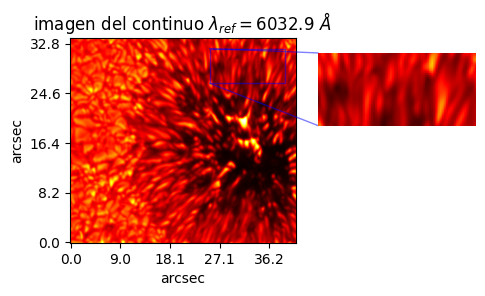

In [15]:
###se introduce la imagen del continuo de la mancha solar analizada, en un zoom de la penumbra

ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
im1=ax1.imshow(image_data[:,:,0,0],origin="lower",cmap="hot")
axins = ax1.inset_axes([1.1, 0.5, 0.7, 0.5])
axins.imshow(image_data[:,:,0,0], cmap="hot", origin="lower")
axins.set_axis_off()
x1,x2,y1,y2=140,xs-10,160,195
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

xs_prima=np.arange(0,xs,50)
xs_real=np.round(np.linspace(0,xs*0.16,len(xs_prima)),decimals=1)
ys_prima=np.arange(0,ys,50)
ys_real=np.round(np.linspace(0,ys*0.16,len(ys_prima)),decimals=1)
plt.xticks(xs_prima,xs_real)
plt.yticks(ys_prima,ys_real)
plt.xlabel("arcsec")
plt.ylabel("arcsec")
ax1.indicate_inset_zoom(axins, edgecolor="blue")





plt.title(r"imagen del continuo $\lambda_{ref}=6032.9$ $\AA$ ")
#plt.savefig("tratamiento_penumbra.pdf", bbox_inches="tight")




0.0164072091281753


(<matplotlib.patches.Rectangle at 0x7fb50745b1f0>,
 (<matplotlib.patches.ConnectionPatch at 0x7fb50c248970>,
  <matplotlib.patches.ConnectionPatch at 0x7fb5074ae620>))

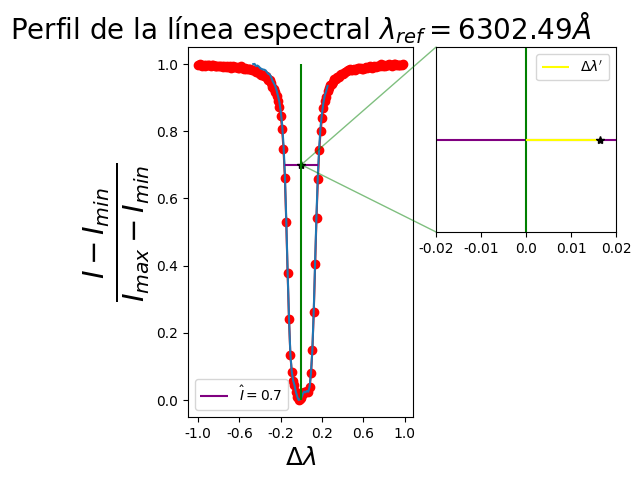

In [16]:
#### perfil de longitud de onda referencia en el pixel x=140, y=170


perfil_ref=image_data[170,140,0,n]
maximo=np.amax(perfil_ref)
minimo=np.amin(perfil_ref)


ax = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
axins = ax.inset_axes([1.1, 0.5, 0.8, 0.5])

#fig.set_size_inches(10,8)





ax.plot(n,(perfil_ref-minimo)/(maximo-minimo),marker="o",color="red") 
ax.set_title("Perfil de la línea espectral $\lambda_{ref} =6302.49 \AA $",fontsize=20)
a=np.arange(0,160,30)
b=np.round(np.linspace(-1,1,len(a)),decimals=1)

ax.set_ylabel(r"$\frac{I-I_{min}}{I_{max}-I_{min}}$",fontsize=30)
ax.set_xlabel(r"$\Delta \lambda $",fontsize=18)
ax.set_xticks(a,b)
x=Symbol("x")
p=np.arange(40,95)
perfil_ref=image_data[170,140,0,p]
maximo=np.amax(perfil_ref)
minimo=np.amin(perfil_ref)
cs = inter(2,x,p,(perfil_ref-minimo)/(maximo-minimo))
ds=[cs.subs(x,i).evalf() for i in p]
ax.plot(p, ds)  




cuarta_linea=solve([cs-0.7],[x])
d0, d1= cuarta_linea[0][0], cuarta_linea[1][0]




ax.hlines(y=0.7, xmin=float(d0), xmax=float(d1),color="purple",label=r"$\hat{I}=0.7$")
ax.plot((d0+d1)/2,0.7,color="black",marker="*",linewidth=2)
ax.vlines(x=75,ymin=0,ymax=1,color="green")


x,y = (-0.01,0.69) 
x2,y2 = (0.01,0.71) 

ax.legend()

axins.hlines(y=0.7, xmin=float(d0), xmax=float(d1),color="purple")
axins.vlines(x=75,ymin=0,ymax=1,color="green")

axins.set_xlim(74.98,75.02)
axins.set_ylim(0.6999, 0.7001)
axins.get_yaxis().set_visible(False)

a=[74.98,74.99,75,75.01,75.02]
b=[a[i]-75 for i in range(len(a))]
b=np.round(b,decimals=2)

axins.set_xticks(a,b)
axins.hlines(y=0.7,xmin=75,xmax=(float(d0)+float(d1))/2, color="yellow", label=r"$\Delta\lambda^{\prime}$")
axins.plot((d0+d1)/2,0.7,color="black",marker="*",linewidth=2)
axins.legend()
print((d0+d1)/2-75)
ax.indicate_inset_zoom(axins, edgecolor="green")
#fig.tight_layout()
#plt.savefig("perfil_spline_linea4.pdf", bbox_inches="tight")




# OJO CON LA SIGUIENTE CELDA!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Va corriendo en i:0 j:80, tiempo (s): 18.85962700843811
Va corriendo en i:1 j:80, tiempo (s): 60.138378620147705
Va corriendo en i:2 j:80, tiempo (s): 104.85050582885742
Va corriendo en i:3 j:80, tiempo (s): 148.6843137741089
Va corriendo en i:4 j:80, tiempo (s): 195.19583797454834
Va corriendo en i:5 j:80, tiempo (s): 248.65354585647583
Va corriendo en i:6 j:80, tiempo (s): 308.08984637260437
Va corriendo en i:7 j:80, tiempo (s): 370.49327087402344
Va corriendo en i:8 j:80, tiempo (s): 434.1103050708771
Va corriendo en i:9 j:80, tiempo (s): 494.1419343948364
Va corriendo en i:10 j:80, tiempo (s): 557.3471210002899
Va corriendo en i:11 j:80, tiempo (s): 623.0100166797638
Va corriendo en i:12 j:80, tiempo (s): 678.913524389267
Va corriendo en i:13 j:80, tiempo (s): 729.3365080356598
Va corriendo en i:14 j:80, tiempo (s): 779.4050652980804
Va corriendo en i:15 j:80, tiempo (s): 831.8929755687714
Va corriendo en i:16 j:80, tiempo (s): 882.5511381626129
Va corriendo en i:17 j:80, tiempo (s

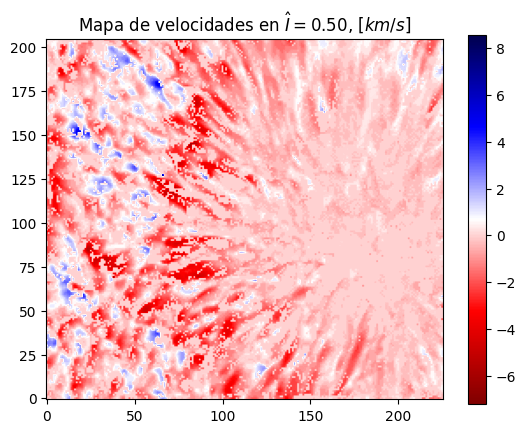

In [17]:
indice_i=[]
indice_j=[]
sln_1=[]
sln_2=[]
errores=pd.DataFrame()
start = time.time()

for i in range(0,xs):
    for j in range(0,ys):
        gris [j,i]=dp.velocidad(i, j, image_data[j,i,0,n], perfil_referencia, c, lr, n,arreglo_correcto,\
                             indice_i,indice_j,sln_1,sln_2)
        if (i)/80==1 or j/80==1:
            end = time.time()
            print("Va corriendo en i:{} j:{}, tiempo (s): {}".format(i,j,end-start))
    
#guardar matriz y posibles errores(Modificacion del DataFrame)         
hdu = fits.PrimaryHDU(gris)
hdu.writeto('sincorregir0_5pequeño.fits', overwrite=True)
errores["indice_i"]=indice_i     
errores["indice_j"]=indice_j    
errores["sln_1"]=sln_1
errores["sln_2"]=sln_2
errores.to_csv('errores0_5pequeño.csv')
orig_map=plt.cm.get_cmap('seismic')
reversed_map = orig_map.reversed()
plt.imshow(gris,vmin=np.min(gris),vmax=np.max(gris),cmap=reversed_map,origin="lower")
plt.colorbar()
plt.title(r"Mapa de velocidades en $\hat{}={:.2f}$, [$km/s$]".format("I",perfil_referencia))
plt.savefig("dopplergrama0_5.png")
plt.show()        




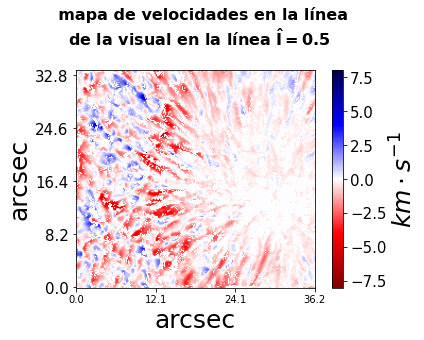

In [53]:
hdul = fits.open("sincorregir0_5pequeño.fits")
gris07 = hdul[0].data
orig_map=plt.cm.get_cmap('seismic')
reversed_map = orig_map.reversed()
plt.imshow(gris07,vmin=-8,vmax=8,cmap=reversed_map,origin="lower")


xs_prima=np.arange(0,xs,75)
xs_real=np.round(np.linspace(0,xs*0.16,len(xs_prima)),decimals=1)
ys_prima=np.arange(0,ys,50)
ys_real=np.round(np.linspace(0,ys*0.16,len(ys_prima)),decimals=1)

plt.colorbar(label=r"$km\cdot s^{-1}$")

plt.xlabel("arcsec")
plt.ylabel("arcsec")
plt.xticks(xs_prima,xs_real)
plt.yticks(ys_prima,ys_real)
      
        
plt.title(r"""  mapa de velocidades en la línea 
de la visual en la línea $\mathbf{\hat{I}=0.5}$ """,
          fontweight ="bold",fontsize="16", x=0.52, y=1.092)

parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35}
plt.rcParams.update(parameters) 
plt. rc ('xtick', labelsize = 10 )
plt. rc ('ytick', labelsize = 15 )


C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


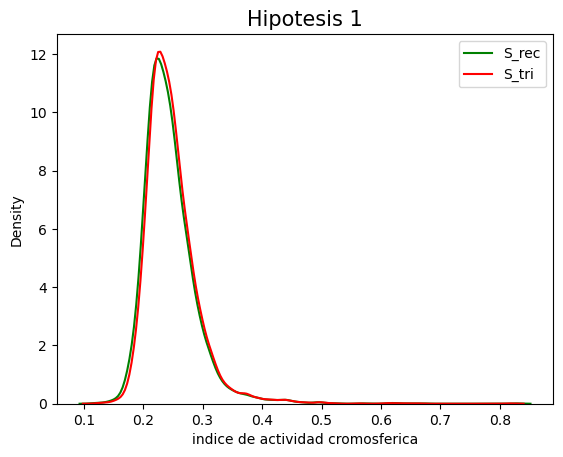

In [107]:
sns.distplot(tabla_numerica.S_rec,color='green',hist=False,label="S_rec")
sns.distplot(tabla_numerica.S_tri,color='red',hist=False,label="S_tri")
plt.xlabel("indice de actividad cromosferica")
plt.title("Hipotesis 1")
plt.legend()
plt.show()

In [49]:
#Como las lineas de flujo de CaII tienen relacion directa con la actividad crosmosferica, y este flujo fue medido para dos bandas de emision 
# 1.09˚A FWHM triangular y 1˚A rectangular para la obtención de los indices de actividad crosmosferica S_tri y S_rec respectivamente.
#Lo que nos lleva a pensar,¿Que banda de emisión proporciona una medida mayor en la actividad crosmosferica?


alpha=0.05
print(levene(tabla_numerica.loc[:,"S_tri"],tabla_numerica.loc[:,"S_rec"])) #se comparan las desviaciones estandares para poder aplicar el
                                                                            #t-test correctamente
t_value1, p_value1 = stats.ttest_ind(tabla_numerica.loc[:,"S_tri"],tabla_numerica.loc[:,"S_rec"])#se comparan los valores medios de S_tri y S_rec
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusión: Como p_value {} es menor que alpha {} ". format (p_value1,alpha))
    print("Se rechaza la hipotesis nula, por lo que las medidas de actividad crosmosferica si difieren del bandpass utilizado")
    
else:
    print("Conclusión: como p_value {} es mayor que alpha {} ". format (p_value1,alpha))
    print("No se puede rechazar la hipotesis nunla,esto es, las medidas de actividas crosmosferica son las mismas para ambos bandpass")
          

LeveneResult(statistic=0.8030018588495424, pvalue=0.3702189720112484)
t_value1 =  3.6422477940799025 , p_value1 =  0.0002716358536594022
Conclusión: Como p_value 0.0002716358536594022 es menor que alpha 0.05 
Se rechaza la hipotesis nula, por lo que las medidas de actividad crosmosferica si difieren del bandpass utilizado


In [99]:
x = np.linspace(-5,20,1000)
m_Hrec,v_Hrec=stats.norm.fit(tabla.H_mean_rec)
H_Nrec= stats.norm(loc=m_Hrec, scale=v_Hrec).pdf(x)
m_Htri,v_Htri=stats.norm.fit(tabla.H_mean_rec)
H_Ntri= stats.norm(loc=m_Htri, scale=v_Hrec).pdf(x)

C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


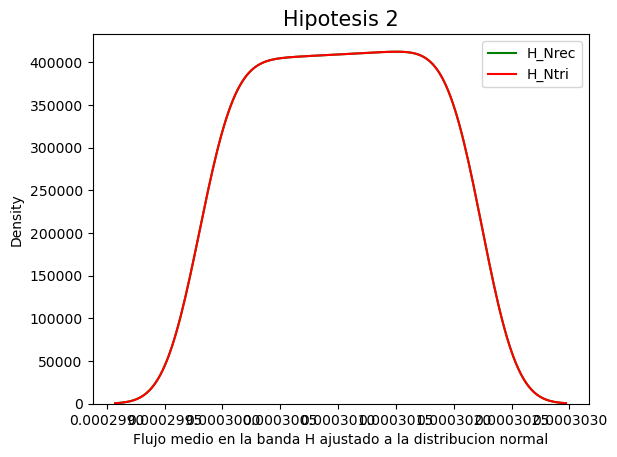

In [127]:
sns.distplot(H_Nrec,color='green',hist=False,label="H_Nrec")
sns.distplot(H_Ntri,color='red',hist=False,label="H_Ntri")
plt.xlabel("Flujo medio en la banda H ajustado a la distribucion normal")
plt.title("Hipotesis 2")
plt.legend()
plt.savefig("Hipotesis2N.pdf", bbox_inches="tight")
plt.show()

C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


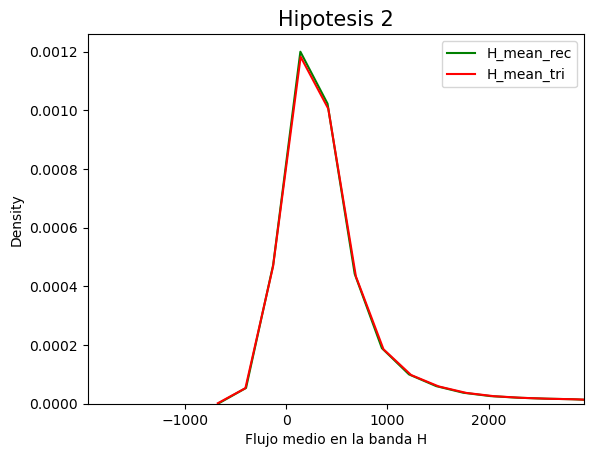

In [128]:
sns.distplot(tabla.H_mean_rec,color='green',hist=False,label="H_mean_rec")
sns.distplot(tabla.H_mean_tri,color='red',hist=False,label="H_mean_tri")
plt.xlabel("Flujo medio en la banda H")
plt.title("Hipotesis 2")
plt.legend()
plt.xlim(tabla.H_mean_rec.mean()-2*tabla.H_mean_rec.std(),tabla.H_mean_rec.mean()+2*tabla.H_mean_rec.std())
plt.savefig("Hipotesis2.pdf", bbox_inches="tight")
plt.show()

In [130]:
#prueba de hipotesis de la banda H
alpha=0.05
print(levene(tabla_numerica.loc[:,"H_mean_tri"],tabla_numerica.loc[:,"H_mean_rec"])) #se comparan las desviaciones estandares para poder aplicar el
                                                                            #t-test correctamente
t_value1, p_value1 = stats.ttest_ind(tabla_numerica.loc[:,"H_mean_tri"],tabla_numerica.loc[:,"H_mean_rec"])#se comparan los valores medios
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusión: Como p_value {} es menor que alpha {} ". format (p_value1,alpha))
    print("Se rechaza la hipotesis nula, por lo que las medias de ambos datos difieren")
    
else:
    print("Conclusión: como p_value {} es mayor que alpha {} ". format (p_value1,alpha))
    print("No se puede rechazar la hipotesis nunla,esto es, las medias de ambos datos son las mismas") 

LeveneResult(statistic=0.04140196787716074, pvalue=0.8387681360852686)
t_value1 =  0.29803445506265025 , p_value1 =  0.7656830657043792
Conclusión: como p_value 0.7656830657043792 es mayor que alpha 0.05 
No se puede rechazar la hipotesis nunla,esto es, las medias de ambos datos son las mismas


In [120]:
m_Krec,v_Krec=stats.norm.fit(tabla.K_mean_rec)
K_Nrec= stats.norm(loc=m_Krec, scale=v_Krec).pdf(x)
m_Ktri,v_Ktri=stats.norm.fit(tabla.K_mean_rec)
K_Ntri= stats.norm(loc=m_Ktri, scale=v_Krec).pdf(x)

C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


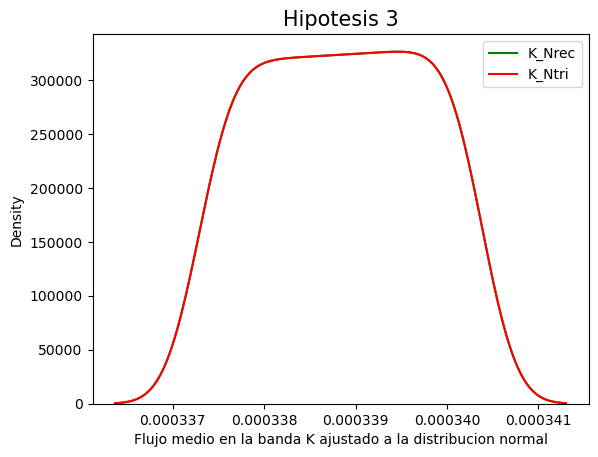

In [205]:
sns.distplot(K_Nrec,color='green',hist=False,label="K_Nrec")
sns.distplot(K_Ntri,color='red',hist=False,label="K_Ntri")
plt.xlabel("Flujo medio en la banda K ajustado a la distribucion normal")
plt.title("Hipotesis 3")
plt.legend()
#plt.savefig("Hipotesis3N.pdf", bbox_inches="tight")
plt.show()

C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


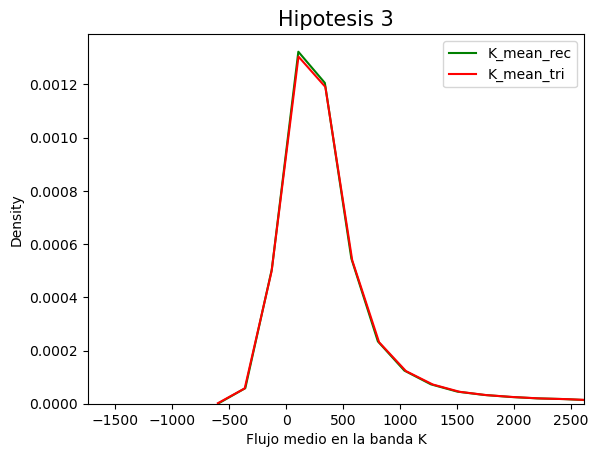

In [206]:
sns.distplot(tabla.K_mean_rec,color='green',hist=False,label="K_mean_rec")
sns.distplot(tabla.K_mean_tri,color='red',hist=False,label="K_mean_tri")
plt.xlabel("Flujo medio en la banda K")
plt.title("Hipotesis 3")
plt.legend()
plt.xlim(tabla.K_mean_rec.mean()-2*tabla.K_mean_rec.std(),tabla.K_mean_rec.mean()+2*tabla.K_mean_rec.std())
#plt.savefig("Hipotesis3.pdf", bbox_inches="tight")
plt.show()

In [129]:
#prueba de hipotesis de la banda K
alpha=0.05
print(levene(tabla_numerica.loc[:,"K_mean_tri"],tabla_numerica.loc[:,"K_mean_rec"])) #se comparan las desviaciones estandares para poder aplicar el
                                                                            #t-test correctamente
t_value1, p_value1 = stats.ttest_ind(tabla_numerica.loc[:,"K_mean_tri"],tabla_numerica.loc[:,"K_mean_rec"])#se comparan los valores medios
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusión: Como p_value {} es menor que alpha {} ". format (p_value1,alpha))
    print("Se rechaza la hipotesis nula, por lo que las medias de ambos datos difieren")
    
else:
    print("Conclusión: como p_value {} es mayor que alpha {} ". format (p_value1,alpha))
    print("No se puede rechazar la hipotesis nunla,esto es, las medias de ambos datos son las mismas")

LeveneResult(statistic=0.03258108256145865, pvalue=0.8567619060881417)
t_value1 =  0.25950121447574914 , p_value1 =  0.7952538933888289
Conclusión: como p_value 0.7952538933888289 es mayor que alpha 0.05 
No se puede rechazar la hipotesis nunla,esto es, las medias de ambos datos son las mismas


C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JULIAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


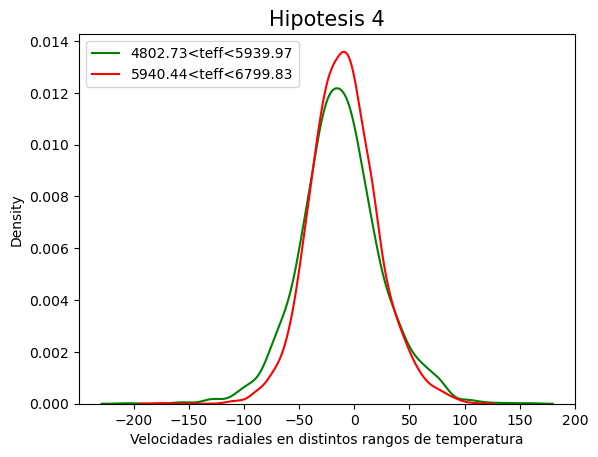

In [207]:
#para hacer un alanisis de las velocidades radiales con respecto a la temperatura, ordenamos los valores de la temperatura para luego dividirla
t=tabla.sort_values(by='teff')
tabla1=t.iloc[0:2499,:]
tabla2=t.iloc[2500:,:]
sns.distplot(tabla1.rv,color='green',hist=False,label="4802.73<teff<5939.97")
sns.distplot(tabla2.rv,color='red',hist=False,label="5940.44<teff<6799.83")
plt.xlabel("Velocidades radiales en distintos rangos de temperatura")
plt.title("Hipotesis 4")
plt.legend()
#plt.savefig("Hipotesis34.pdf", bbox_inches="tight")
plt.show()

In [203]:
#ahora se mirara si hay diferencia entre las velocidades radiales obtenidas para estos rangos de temperatura
print(levene(tabla1.loc[:,"rv"],tabla2.loc[:,"rv"])) #se comparan las desviaciones estandares para poder aplicar el
                                                                            #t-test correctamente
t_value1, p_value1 = stats.ttest_ind(tabla1.loc[:,"rv"],tabla2.loc[:,"rv"],equal_var=False)#se comparan los valores medios. Como las desviaciones estandares
                                                                            #son distintas, se procede a usar el parametro adicion en el t-test
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

if p_value1 <alpha:
    print("Conclusión: Como p_value {} es menor que alpha {} ". format (p_value1,alpha))
    print("Se rechaza la hipotesis nula, por lo que las medias de ambos datos difieren")
    
else:
    print("Conclusión: como p_value {} es mayor que alpha {} ". format (p_value1,alpha))
    print("No se puede rechazar la hipotesis nunla,esto es, las medias de ambos datos son las mismas")


LeveneResult(statistic=46.36201768033138, pvalue=1.098924852184284e-11)
t_value1 =  -3.416747223523589 , p_value1 =  0.0006389625345422511
Conclusión: Como p_value 0.0006389625345422511 es menor que alpha 0.05 
Se rechaza la hipotesis nula, por lo que las medias de ambos datos difieren


In [208]:
#ANOVA test
print(levene(tabla.K_mean_rec,tabla.H_mean_rec,tabla.V_mean,tabla.R_mean)) # el levene test no dice si las varianzas de los grupos en cuestion
                                    #son iguales o no, como el p_value es muy pequeño se rechaza la hipotesis nula y se concluye que son distintas.
stats.f_oneway(tabla.K_mean_rec,tabla.H_mean_rec,tabla.V_mean,tabla.R_mean) #se aplica el test con la estadistica f relacionado con eL ANOVA test
#co

LeveneResult(statistic=132.07723391112918, pvalue=9.96587658777682e-85)


F_onewayResult(statistic=279.99478734969176, pvalue=4.8135672022947705e-178)